In [3]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Synthetic data
from sklearn.datasets import make_blobs

In [4]:
#Random number generator
rng = np.random.default_rng(seed = 44)

# Synthetic data, unknown number of clusters
centers = rng.integers(low = 3, high = 7)
x, y, z = make_blobs(n_samples = 1000, n_features = 6, centers = centers, return_centers = True, random_state = 42)

# Dataframe
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5
0,-1.534288,5.467808,-6.945988,1.403934,1.553836,-7.618236
1,-6.681020,6.717808,2.764396,4.460744,-8.286569,10.959708
2,-8.678310,7.825306,3.139699,5.609951,-9.948079,8.072149
3,-6.667385,7.147637,2.145505,4.712937,-9.544708,11.093248
4,-2.753835,-4.209968,0.620345,-7.439505,-4.405723,-2.046149


In [9]:
# Scale data. Usually best to scale
x_scaled = StandardScaler().fit_transform(x)
x_scaled[:2,:]

# Instance
kmeans3 = KMeans(n_clusters=3, random_state=42)

# Fit model to data
kmeans3.fit(x_scaled)

print('Clusters: ', kmeans3.labels_)
print('Intertia: ', kmeans3.inertia_)

# 0, 1, or 2 indicates the cluster each data point is assigned to
# Intertia measures tightness between data points and the centroid

# Low inertia is better. One inertia value doesn't tell you anything though,
# needs comparison between multiple values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clusters:  [1 2 2 2 0 0 0 2 2 1 0 2 2 1 2 2 2 2 0 0 0 2 2 2 1 1 0 2 2 0 0 2 0 0 1 1 0
 2 2 2 0 2 0 2 2 0 0 1 2 1 0 0 0 1 1 1 0 2 0 1 0 0 0 0 0 0 0 1 0 0 2 0 0 0
 2 0 2 1 1 2 1 2 0 1 0 2 1 1 2 1 2 0 1 2 0 1 0 2 2 0 0 2 2 2 2 2 2 0 0 2 1
 0 2 0 2 2 0 0 1 0 0 0 2 0 0 2 2 0 1 2 1 1 1 0 2 1 1 0 2 0 0 0 2 1 1 1 0 0
 2 0 0 2 0 0 2 2 1 2 1 2 2 0 2 2 2 2 0 0 2 0 2 2 0 2 2 1 2 2 1 1 0 2 0 2 0
 2 1 2 1 2 0 0 0 2 2 2 1 1 2 0 2 2 0 2 0 0 0 0 0 1 0 1 2 2 0 1 1 2 0 0 1 0
 2 2 2 2 0 0 0 2 1 0 1 2 1 2 1 0 0 2 2 2 1 1 0 0 1 1 1 2 2 2 0 0 0 2 2 2 0
 2 0 1 0 2 2 1 1 0 0 2 0 1 2 0 2 2 2 2 0 2 2 0 2 2 0 0 0 0 0 2 1 0 2 0 1 1
 0 2 2 0 2 2 2 2 2 2 1 2 1 0 2 2 1 0 0 2 0 2 2 1 2 0 2 2 2 0 0 0 1 1 1 0 1
 1 1 2 2 1 2 1 0 2 0 1 2 1 0 2 0 2 2 2 2 0 0 2 0 2 0 0 0 1 2 2 2 2 2 0 0 1
 0 2 2 0 2 0 0 2 0 2 1 2 2 0 2 0 0 1 2 0 0 0 1 0 0 2 0 2 0 2 1 2 0 2 2 0 0
 1 2 0 0 1 0 0 2 2 2 2 0 2 0 2 2 1 1 0 1 0 0 0 2 2 1 0 2 2 2 0 2 0 2 1 2 0
 1 0 0 0 2 0 1 2 0 1 2 2 0 0 0 0 0 2 2 0 2 2 0 2 2 0 0 1 0 1 2 0 0 0 0 1 2
 2 0 2 2 1 1 2

In [14]:
# Run through multiple possible k values, put into list
num_clusters = [i for i in range(2, 11)]

def kmeans_inertia(num_clusters, x_vals):
  inertia = []
  for num in num_clusters:
    kms = KMeans(n_clusters = num, random_state = 42)
    kms.fit(x_vals)
    inertia.append(kms.inertia_)

  return inertia

In [20]:
# Run function on data
inertia = kmeans_inertia(num_clusters, x_scaled)
inertia

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[3090.3260348468543,
 1748.1488703079513,
 863.1663243212959,
 239.65434758718436,
 229.97193447062892,
 221.55016192539154,
 214.37627403442247,
 206.67023398404046,
 199.2336322973373]

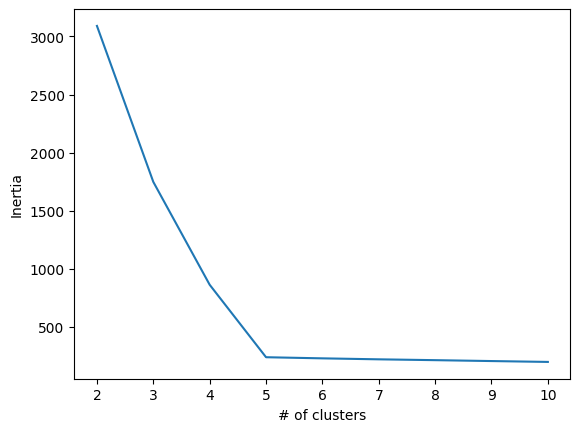

In [21]:
import seaborn as sns

plot = sns.lineplot(x = num_clusters, y = inertia)
plot.set_xlabel('# of clusters');
plot.set_ylabel('Inertia');

# Suggests 5-cluster model. Coroborate with silhouette score

In [22]:
kmeans3_sil_score = silhouette_score(x_scaled, kmeans3.labels_)
kmeans3_sil_score

# Also needs comparison to be intelligible

0.5815196371994132

In [24]:
def kmeans_sil(num_clusters, x_vals):

    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))

    return sil_score

In [27]:
sil_score = kmeans_sil(num_clusters, x_scaled)
sil_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[0.4792051309087745,
 0.5815196371994132,
 0.6754359269330664,
 0.7670656870960783,
 0.6536170057112888,
 0.5251340670197663,
 0.39825007246113,
 0.2718615021565435,
 0.15338235080532905]

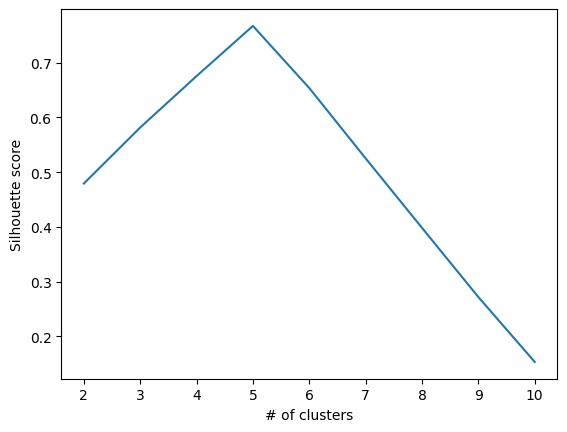

In [28]:
plot = sns.lineplot(x = num_clusters, y = sil_score)
plot.set_xlabel('# of clusters');
plot.set_ylabel('Silhouette score');

# Confirms k = 5 is best

In [32]:
# New model with 5 clusters
kmeans5 = KMeans(n_clusters = 5, random_state = 42)
kmeans5.fit(x_scaled)

print(kmeans5.labels_[:5])
print('Unique labels: ', np.unique(kmeans5.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[3 2 2 2 1]
Unique labels:  [0 1 2 3 4]
